Column Names: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']

Top 5 rows:
  Province/State      Country       Lat       Long        Date  Confirmed  \
0            NaN  Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN      Albania  41.15330  20.168300  2020-01-22          0   
2            NaN      Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN      Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN       Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4

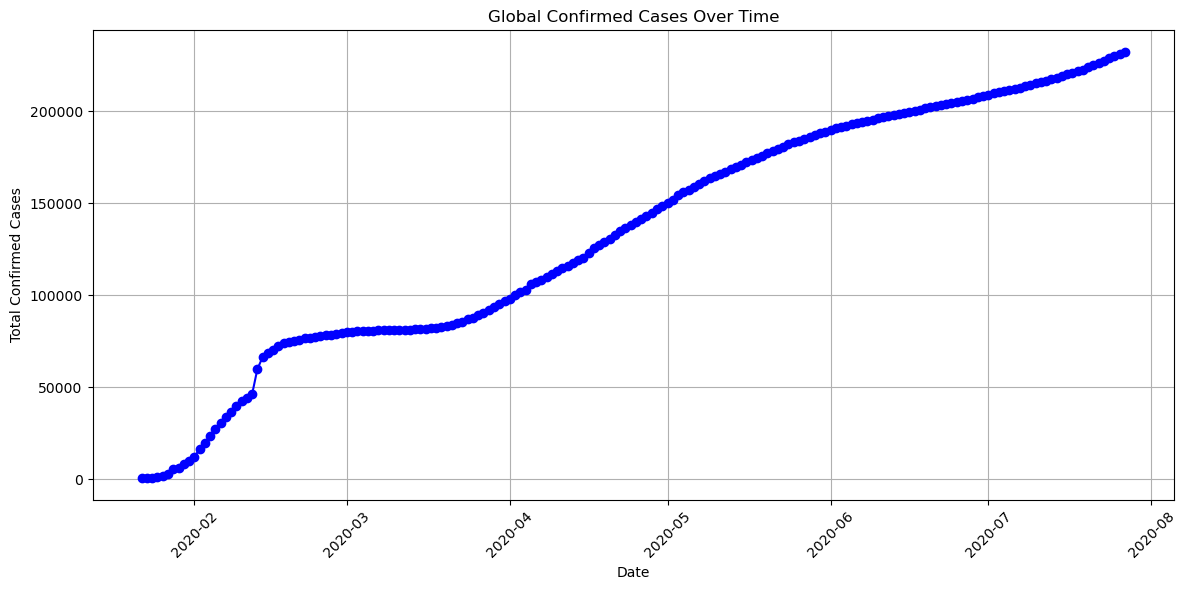

C:\Users\HP\AppData\Local\Temp\ipykernel_17848\3383558823.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_deaths.values, y=top10_deaths.index, palette='Reds_r')


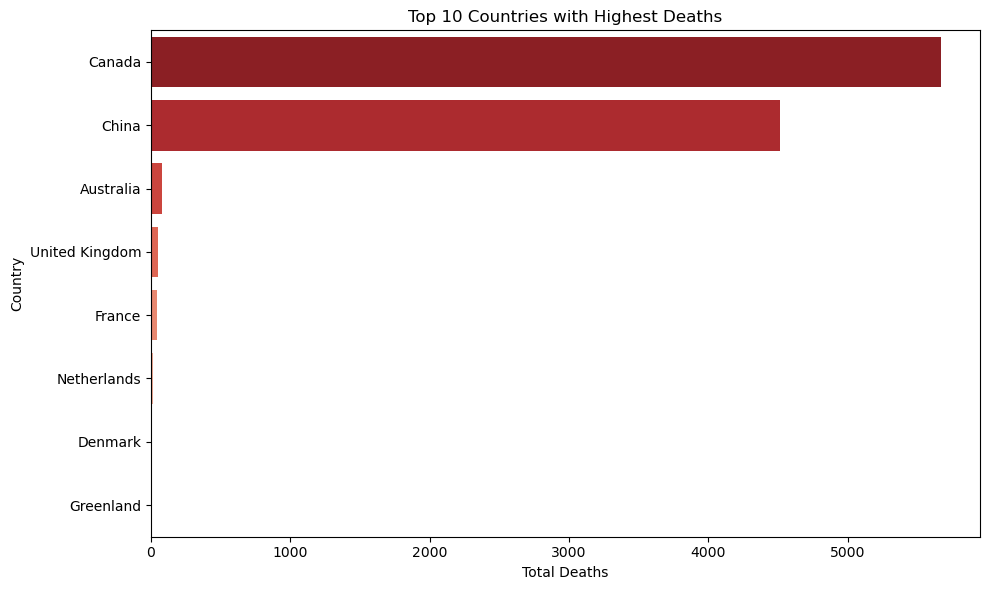

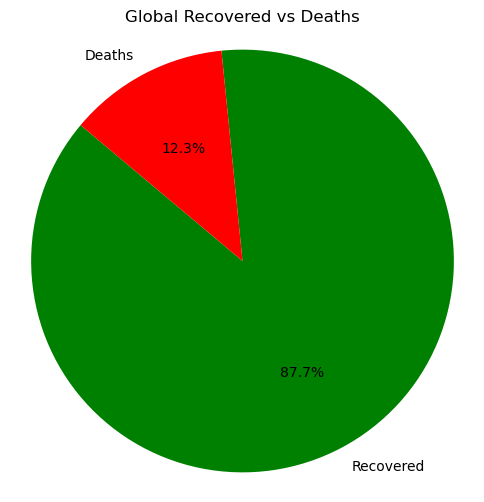


Short Observations:

✅ The dataset includes data from 8 countries.
✅ The top 10 most affected countries by confirmed cases are: China, Canada, Australia, France, United Kingdom, Denmark, Netherlands, Greenland.
✅ Confirmed cases have increased significantly over time globally.
✅ Countries like Canada, China, Australia have the highest deaths.
✅ Overall, recovered cases outnumber deaths significantly, showing positive recovery rates.



In [5]:

# Dataset: covid_19_clean_complete.csv
# Libraries: pandas, matplotlib, seaborn
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('covid_19_clean_complete.csv')

# View column names to confirm correct usage
print("Column Names:", df.columns.tolist())

# Rename columns for consistency (if needed)
# In the dataset 'covid_19_clean_complete.csv', typical column names:
# 'Date', 'Country/Region', 'Confirmed', 'Recovered', 'Deaths'
df.rename(columns={'Country/Region': 'Country'}, inplace=True)

# Top 5 rows
print("\nTop 5 rows:")
print(df.head())

# Dataset Info
print("\nDataset Info:")
print(df.info())

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for Null Values
print("\nNull Values in each column:")
print(df.isnull().sum())

# Drop rows with any missing values
df = df.dropna()

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Number of unique countries
num_countries = df['Country'].nunique()
print("\nNumber of countries in the dataset:", num_countries)

# Top 10 most affected countries by confirmed cases (cumulative)
most_affected = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10)
print("\nTop 10 most affected countries (by max confirmed cases):")
print(most_affected)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Global confirmed cases over time
global_trend = df.groupby('Date')['Confirmed'].sum()

plt.figure(figsize=(12, 6))
plt.plot(global_trend.index, global_trend.values, marker='o', linestyle='-', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 countries with highest deaths (cumulative)
top10_deaths = df.groupby('Country')['Deaths'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_deaths.values, y=top10_deaths.index, palette='Reds_r')
plt.title('Top 10 Countries with Highest Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Pie chart: Global recovered vs deaths (cumulative)
total_recovered = df.groupby('Date')['Recovered'].sum().max()
total_deaths = df.groupby('Date')['Deaths'].sum().max()
labels = ['Recovered', 'Deaths']
sizes = [total_recovered, total_deaths]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Global Recovered vs Deaths')
plt.axis('equal')
plt.show()

# Short Observations
print("\nShort Observations:")
print("""
✅ The dataset includes data from {} countries.
✅ The top 10 most affected countries by confirmed cases are: {}.
✅ Confirmed cases have increased significantly over time globally.
✅ Countries like {} have the highest deaths.
✅ Overall, recovered cases outnumber deaths significantly, showing positive recovery rates.
""".format(
    num_countries,
    ', '.join(most_affected.index),
    ', '.join(top10_deaths.index[:3])
))
